In [1]:
### CSE353 HW 7 
### Yajie Wang
import numpy as np
import matplotlib.pyplot as plt
from qpsolvers import solve_qp


# load the dataset
x = np.loadtxt('/Users/yajiewang/Downloads/cse353hw7/X_LinearSeparable.txt', delimiter=',').T
y = np.loadtxt('/Users/yajiewang/Downloads/cse353hw7/Y_LinearSeparable.txt', delimiter=',')


In [2]:
# find (w,b)
phi = np.zeros(3).T
H = np.identity(3)
A = np.zeros(40).reshape((-1,2))
for i in range(x.shape[0]):
    A[i]=np.dot(-y[i],x[i].T)
C = -np.ones(x.shape[0])
A = np.c_[-y,A]
q = solve_qp(H,phi,A,C)
print(q)

[  0.10204082  28.57142857 -27.75510204]


In [3]:
# find support vectors
svs = []
for i in range(x.shape[0]):
    cur = y[i]*(q[1] * x[i][0] + q[2] * x[i][1] + q[0])
    if cur >= 0.95 and cur <= 1.05:
        svs.append((x[i][0],x[i][1]))

print(svs);

[(0.76, 0.75), (0.08, 0.05), (0.69, 0.75)]


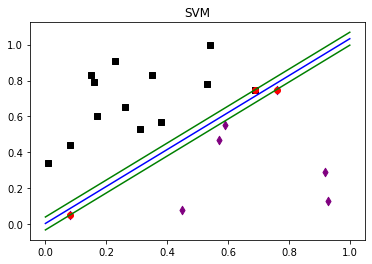

In [4]:
# plot
p1 = [0,(-q[1]*0-q[0])/q[2]]
p2 = [1,(-q[1]*1-q[0])/q[2]]
x_values = [p1[0],p2[0]]
y_values = [p1[1],p2[1]]
plt.plot(x_values,y_values,'blue')

a1 = []
b1 = []
a2 = []
b2 = []
s1 = []
s2 = []
for i in range(x.shape[0]):
    if (y[i] == 1):
        a1.append(x[i][0])
        b1.append(x[i][1])
    else:
        a2.append(x[i][0])
        b2.append(x[i][1])
    
for i in range(len(svs)):
    s1.append(svs[i][0])
    s2.append(svs[i][1])
    

      
plt.scatter(a1,b1,marker = 'd',color = 'purple')
plt.scatter(a2,b2,marker = 's',color = 'black')

plt.scatter(s1,s2,marker = 'o',color = 'red')

p1 = [0, (-q[1]*0-(q[0]+1))/q[2]]
p2 = [1, (-q[1]*1-(q[0]+1))/q[2]]
x_values = [p1[0], p2[0]]
y_values = [p1[1], p2[1]]
plt.plot(x_values,y_values,'green')

p1 = [0, (-q[1]*0-(q[0]-1))/q[2]]
p2 = [1, (-q[1]*1-(q[0]-1))/q[2]]
x_values = [p1[0], p2[0]]
y_values = [p1[1], p2[1]]
plt.plot(x_values,y_values,'green')

plt.title('SVM')
plt.show()